***
# Data Collection List of Super Bowl Champions
***
In this quick project, I wanted to use Python, JavaScript and VBA to collect data from a table of all Super Bowl Champions from Wikipedia.  In this jupyter lab Pyhton will be utilized with a few imports.  

[Link to the Wikipedia Page](https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions)

Additionally, with this project the IDE being used is `Jupyter Lab` which has recently been released as an extension/improvement of the classic Jupyter Notebook.  What are notbooks?  Jupyter notebooks are documents that combine live runnable code with narrative text (Markdown), equations (LaTeX), images, interactive visualizations and other rich output. This particular cell is a markdown cell. You can do a lot with markdowns cells, [Details Here](https://www.tutorialspoint.com/jupyter/jupyter_notebook_markdown_cells.htm)  If you want to learn more about this amazing IDE [check out jupyter.org](https://jupyter.org/)

Also, take a few minutes and read this [article](https://medium.com/swlh/why-traders-and-finance-professionals-need-to-learn-python-97efc38d167) before moving on.  


In [293]:
# import the modules we will need to this project
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import unidecode
import seaborn as sns
import matplotlib.pyplot as plt

## The table we are looking to pull data from
![HTML Snapshot of Table](super_table.PNG)

I am using the `Chrome` browser so to inspect the page right click anywhere on the site and click inspect. Then find the `Elements` tab and start investigating the HTML.  Below is an image from the DOM and I have re-created a portion of what we want to access. For this project we want to grab `thead` element and `tbody`. Within the first we want everything contained within `<th></th>` and the second part everything between `<td></td>`.

```
<table>
   <caption>if avail want</caption>
   <thead>
    <tr>
       <th>Game</th>
       <th>Date/Season</th>
       <th>Winning Team</th>
       <th>Score</th>
       <th>etc</th>
     </tr>
    </thead>
    <tbody>
      <tr>
        <td><a>I</a></td>  
        <td><a>January, 15 1967</a></td>
        <td><a>Green Bay Packers</a></td>
        <td><a>Kansas City Chiefs</a></td>
        <td><a>35 - 10</a></td>
        <td><a>etc</a></td>
      </tr>
     </tbody>
     <tfoot> 
       <tr>Dont care about</tr>
     </tfoot>
</table>
```

![HTML from site](table_DOM.PNG)

In [251]:
# Create a function that will be used later to check connection status

def check_response(resp_obj):
    # if the requests object returns 200 we have a connection
    try:
        if resp_obj.status_code == 200:
            print(f"Connection OK: {resp_obj.status_code}")
    except:
        # If we are not able to access the page what was the HTTP error code
        # 4xx: CLient Server, 5xx: Server Error will be the most common
        print(f"Error: Not 200 return value was: {resp_obj}")

In [252]:
# Convert the address to a raw string 
url_sbw = r"https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions"

# Using requests and get access the address
page_sbw = requests.get(url_sbw)

# call our function from above and print the connection status
check_response(page_sbw)

Connection OK: 200


In [253]:
# Using bs4 we can create the Soup
soup = BeautifulSoup(page_sbw.text, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [254]:
# soup.body will access all of the HTML within the body tags <body>...</body>
# The table is contained there so no reason to return all of the information within the header, too
body_tag = soup.body
# confirm the element type
type(body_tag)

bs4.element.Tag

There are four tables on this page and we can access them using the `table` tag and class name. The screen shot of the HTML shows the first and second table which will be index 0 and 1 within the list.  We want the second table which will be at index 1. 
* `<table class="wikitable sortable jquery-tablesorter">`
 
![table and class](table_class.PNG)

In [255]:
# Here we use find_all looking for the tag table and attribute class name 'wikitable'
tables = body_tag.find_all('table',{'class': 'wikitable'})
print(type(tables))
# Check the length of variable tables it should contain 4 tables
print(f"Returns the four tables we want {len(tables)}")

<class 'bs4.element.ResultSet'>
Returns the four tables we want 4


Using `find_all()` to look at all table tags with the class `wikitable` returned four individual tables. We can access these tables individually. The table we are looking for is the second table or index 1.  Below is the print out of that table. This is long so it will take a little bit of scrolling to reach the bottom of the cell.

In [256]:
# from the four tables we want index 1
sb_table = tables[1]
sb_table

<table class="wikitable sortable">
<caption>Super Bowl championships
</caption>
<tbody><tr>
<th>Game
</th>
<th>Date/<wbr/>Season
</th>
<th>Winning team
</th>
<th>Score
</th>
<th>Losing team
</th>
<th>Venue
</th>
<th>City
</th>
<th>Attendance
</th>
<th class="unsortable">Ref
</th></tr>
<tr>
<td style="text-align: center;"><span data-sort-value="01 !"><a href="/wiki/Super_Bowl_I" title="Super Bowl I">I</a><br/><sup class="reference" id="cite_ref-WCGs_12-0"><a href="#cite_note-WCGs-12">[sb 1]</a></sup></span>
</td>
<td><span data-sort-value="000000001967-01-15-0000" style="white-space:nowrap">January 15, 1967</span> (<a href="/wiki/1966_American_Football_League_season" title="1966 American Football League season">1966 AFL</a>/<a href="/wiki/1966_NFL_season" title="1966 NFL season">1966 NFL</a>)
</td>
<td style="background:#d0e7ff;"><span data-sort-value="Green Bay Packers 01 !"><a href="/wiki/1966_Green_Bay_Packers_season" title="1966 Green Bay Packers season">Green Bay Packers</a><sup>n<

##  Table Header
If the table has a header we will want to access that information. We have the table so all we need to do is access find the `th` 
* `<th>...</th>`

![Table Header](header_table.PNG)

In [257]:
# Using find_all() to access the first header which is a bs4 element tag 
print(type(sb_table.find_all('th')[0]))
print('='*45)

# We can convert the tag to a string and remove the tags/angle brackets
print(sb_table.find_all('th')[0].string.rstrip("\n"))
print('='*45)
print("If we do not utilize .sting.rstrip(\'\\n')")
print(sb_table.find_all('th')[0])

<class 'bs4.element.Tag'>
Game
If we do not utilize .sting.rstrip('\n')
<th>Game
</th>


In [258]:
# Printing all of the headers
sb_table.find_all('th')

[<th>Game
 </th>,
 <th>Date/<wbr/>Season
 </th>,
 <th>Winning team
 </th>,
 <th>Score
 </th>,
 <th>Losing team
 </th>,
 <th>Venue
 </th>,
 <th>City
 </th>,
 <th>Attendance
 </th>,
 <th class="unsortable">Ref
 </th>,
 <th>Game
 </th>,
 <th>Date/<wbr/>Season
 </th>,
 <th>Winning team
 </th>,
 <th>Score
 </th>,
 <th>Losing team
 </th>,
 <th>Venue
 </th>,
 <th>City
 </th>,
 <th>Attendance
 </th>,
 <th>Ref
 </th>]

### Header Names
To access the header names we will need to check the tag to validate the format. One column has the slightly different HTML format. We can use `.contents` which is a list of the tags returned for a particular index. If  greater than 1 then we know that we need to grab idex 0 and 2, `['Date/', <wbr/>, 'Season\n']`. Otherwise we can convert like we have already done.


In [259]:
headerNames = []
for i in range(len(sb_table.find_all('th'))):
    try:
        # Check if .contents is . than 1
        if len(sb_table.find_all('th')[i].contents) > 1:
            convert = list(sb_table.find_all('th')[i].contents)
            name = convert[0].rstrip("\n") + convert[2].rstrip("\n`")
            headerNames.append(name)
        else:
            name = sb_table.find_all('th')[i].string.rstrip("\n")
            headerNames.append(name)
    except:
        pass

# Print our list of clean headers
print(headerNames)

['Game', 'Date/Season', 'Winning team', 'Score', 'Losing team', 'Venue', 'City', 'Attendance', 'Ref', 'Game', 'Date/Season', 'Winning team', 'Score', 'Losing team', 'Venue', 'City', 'Attendance', 'Ref']


## Accessing Rows of Data from Table

Each row of data is between the the `tr` tags and the individual column data is between the `td` tags. Depending on the column we will have have to access the text data from an `a` tag or a `span` tag.  We can check the column index using the % operator returing `0` if even or simply the value `5`.  Otherwise the text is enclosed in an `a` tag. 

* Find **a** tags `[0, 2, 4, 5, 6, 8]`
* Find **span** tags `[1, 3, 7]`

Also, notice that a try/except block is used.  Missing values will cause an error skipping `try` and moving to the `except` block. At this point we know there is a missing value so from the library we imported `NumPy` we can use the `np.nan` to add the `NaN` value.  Note: Python does not use the keyword `NULL` only NaN and None. Click [here](https://medium.com/analytics-vidhya/dealing-with-missing-values-nan-and-none-in-python-6fc9b8fb4f31) to learn more and how pandas treats NaN and None. 

In [260]:
# Create a Python dictionary called winnerObj and add the `keys'
winnerObj = {}

for name in headerNames:
    winnerObj[name] = []
    
print(winnerObj)

{'Game': [], 'Date/Season': [], 'Winning team': [], 'Score': [], 'Losing team': [], 'Venue': [], 'City': [], 'Attendance': [], 'Ref': []}


In [261]:
len(winnerObj.keys())

9

In [262]:
j = 0

# 9 columns by 58 rows = 522 
while j < len(sb_table.find_all('td')):     

    i = 0
    # 9 columns
    while i < len(winnerObj.keys()):
        try:
            # Check if index is even or 5. If True its an 'a' tag
            if i % 2 == 0 or i == 5:                           
                winnerObj[headerNames[i]].append(sb_table.find_all('td')[j].find('a').string)
            else:
                # Its not an 'a' tag so we find 'span'
                winnerObj[headerNames[i]].append(sb_table.find_all('td')[j].find('span').string)
                if winnerObj[headerNames[i]][-1] == "To be determined":
                    print(f"It is and i is {i} and j is {j}")
            i += 1
            j += 1
        
        except:
            # Using Numpy nan function 
            winnerObj[headerNames[i]].append(np.nan)
            i += 1
            j += 1

# Print the dictionary created. Each header is a key and each value for the respected header is contained within a list
print(winnerObj)

{'Game': ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV', 'XV', 'XVI', 'XVII', 'XVIII', 'XIX', 'XX', 'XXI', 'XXII', 'XXIII', 'XXIV', 'XXV', 'XXVI', 'XXVII', 'XXVIII', 'XXIX', 'XXX', 'XXXI', 'XXXII', 'XXXIII', 'XXXIV', 'XXXV', 'XXXVI', 'XXXVII', 'XXXVIII', 'XXXIX', 'XL', 'XLI', 'XLII', 'XLIII', 'XLIV', 'XLV', 'XLVI', 'XLVII', 'XLVIII', 'XLIX', '50', 'LI', 'LII', 'LIII', 'LIV', 'LV', 'LVI', 'LVII', 'LVIII'], 'Date/Season': ['January 15, 1967', 'January 14, 1968', 'January 12, 1969', 'January 11, 1970', 'January 17, 1971', 'January 16, 1972', 'January 14, 1973', 'January 13, 1974', 'January 12, 1975', 'January 18, 1976', 'January 9, 1977', 'January 15, 1978', 'January 21, 1979', 'January 20, 1980', 'January 25, 1981', 'January 24, 1982', 'January 30, 1983', 'January 22, 1984', 'January 20, 1985', 'January 26, 1986', 'January 25, 1987', 'January 31, 1988', 'January 22, 1989', 'January 28, 1990', 'January 27, 1991', 'January 26, 1992', 'January 31, 1

In [263]:
# Access the first three winning teams for validation
for i in range(3):
    wt = winnerObj['Winning team'][i]
    print(f"Team to win Super Bowl {i+1} was {wt}!")

Team to win Super Bowl 1 was Green Bay Packers!
Team to win Super Bowl 2 was Green Bay Packers!
Team to win Super Bowl 3 was New York Jets!


### Valdiate Value Length 
The value length for each each key should be the same. It should be 58 for each.

In [264]:
# check the length of values within each value 
# The values are stored within a list
for i in winnerObj.values():
    print(len(i))

58
58
58
58
58
58
58
58
58


In [265]:

superBowls_df = pd.DataFrame.from_dict(winnerObj)
superBowls_df.head(10)

,Game,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Ref
0,I,"January 15, 1967",Green Bay Packers,35–10,Kansas City Chiefs,Los Angeles Memorial Coliseum,"Los Angeles, California","61,946",[12]
1,II,"January 14, 1968",Green Bay Packers,33–14,Oakland Raiders,Miami Orange Bowl,"Miami, Florida","75,546",[14]
2,III,"January 12, 1969",New York Jets,16–7,Baltimore Colts,Miami Orange Bowl,"Miami, Florida","75,389",[15]
3,IV,"January 11, 1970",Kansas City Chiefs,23–7,Minnesota Vikings,Tulane Stadium,"New Orleans, Louisiana","80,562",[16]
4,V,"January 17, 1971",Baltimore Colts,16–13,Dallas Cowboys,Miami Orange Bowl,"Miami, Florida","79,204",[17]
5,VI,"January 16, 1972",Dallas Cowboys,24–3,Miami Dolphins,Tulane Stadium,"New Orleans, Louisiana","81,023",[18]
6,VII,"January 14, 1973",Miami Dolphins,14–7,Washington Redskins,Los Angeles Memorial Coliseum,"Los Angeles, California","90,182",[19]
7,VIII,"January 13, 1974",Miami Dolphins,24–7,Minnesota Vikings,Rice Stadium,"Houston, Texas","71,882",[20]
8,IX,"January 12, 1975",Pittsburgh Steelers,16–6,Minnesota Vikings,Tulane Stadium,"New Orleans, Louisiana","80,997",[21]
9,X,"January 18, 1976",Pittsburgh Steelers,21–17,Dallas Cowboys,Miami Orange Bowl,"Miami, Florida","80,187",[22]


In [266]:
superBowls_df.tail(10)

,Game,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Ref
48,XLIX,"February 1, 2015",New England Patriots,28–24,Seattle Seahawks,University of Phoenix Stadium,"Glendale, Arizona","70,288",[71]
49,50,"February 7, 2016",Denver Broncos,24–10,Carolina Panthers,Levi's Stadium,"Santa Clara, California","71,088",[74]
50,LI,"February 5, 2017",New England Patriots,None,Atlanta Falcons,NRG Stadium,"Houston, Texas","70,807",[77]
51,LII,"February 4, 2018",Philadelphia Eagles,41–33,New England Patriots,U.S. Bank Stadium,"Minneapolis, Minnesota","67,612",[78]
52,LIII,"February 3, 2019",New England Patriots,13–3,Los Angeles Rams,Mercedes-Benz Stadium,"Atlanta, Georgia","70,081",[83]
53,LIV,"February 2, 2020",Kansas City Chiefs,31–20,San Francisco 49ers,Hard Rock Stadium,"Miami Gardens, Florida","62,417",[84]
54,LV,"February 7, 2021",2020–21 AFC champion,—,NaN,Raymond James Stadium,"Tampa, Florida",TBD,[84]
55,LVI,"February 6, 2022",2021–22 NFC champion,—,NaN,SoFi Stadium,"Inglewood, California",TBD,[84]
56,LVII,"February 5, 2023",2022–23 AFC champion,—,NaN,State Farm Stadium,"Glendale, Arizona",TBD,[86]
57,LVIII,"February 4, 2024",2023–24 NFC champion,—,NaN,Mercedes-Benz Superdome,"New Orleans, Louisiana",TBD,[86]


## Quick Data Cleaning 
When looking at the data set there are a couple spots that should be cleaned up.  The headers should be all lower case and connected with an underscore. For larger projects this helps reduce errors when referencing columns, by name. Also, we have a few rows containing a '-' character that should be converted to '-'. 

In [267]:
# create a list of columm names from the pandas dataframe
df_col_names = list(superBowls_df.columns)

for name in df_col_names:
    idx = df_col_names.index(name) # get location of each 'name' in list
    
    if name.find("/",0) or name.find(" ",0): 
        del df_col_names[idx]
        word = name.replace(" ",'_') # replace space wiht underscore 
        word = word.replace("/",'_') # replace '/' with underscore
        word = word.lower() # convert to lower case
        df_col_names.insert(idx, word) # above we found the index. Use insert() to replace with new word by index
        
        
# apply the new col names to datframe 
superBowls_df.columns = df_col_names

In [268]:
# Validaet the new column names are correct
superBowls_df.head(0)

,game,date_season,winning_team,score,losing_team,venue,city,attendance,ref


## Quick Review of Data
We have taken a look at the head and tail of the data we imported. Now lets run a few other checks really quick to understand what we are working with. We can quickly check the data types using `dtypes`. They are all type `object` which is defined as: **Text or mixed numeric and non-numeric values** 
1) Convert attendance to `int64` - Integer numbers
2) Parse score into two columns with the data type `int64`
3) Convert game to `int64` and convert roman numerals to digits
4 We can drop the `ref` column as there will not be any value for analysis 

In [269]:
# All the colums are type object
superBowls_df.dtypes

game            object
date_season     object
winning_team    object
score           object
losing_team     object
venue           object
city            object
attendance      object
ref             object
dtype: object

### First lets get the shape of the dataframe so we can validate our changes 

In [270]:
tup = superBowls_df.shape
print(f"The dataframe has {tup[0]} rows and {tup[1]} columns.")

The dataframe has 58 rows and 9 columns.


### Dropping ***ref*** Column 
With pandas we can drop a column or columns by using the name or index. Here we use drop and the column name. 

In [271]:
# Drop ref column 
superBowls_df = superBowls_df.drop(['ref'], axis = 1) 
# validate that there are only 8 columns
superBowls_df.head(0)

,game,date_season,winning_team,score,losing_team,venue,city,attendance


### Checking for Missing and Null Values
Using  `isnull()` combined with `sum()` allows us to quickly check for missing values. There are a total of 5 missing values. 1 is the score of the New England Patriots amazing come form behind win over the Atlanta Falcons. We can look that up and add. The other four are future events and we can drop those.  

In [272]:
superBowls_df.isnull().sum()

game            0
date_season     0
winning_team    0
score           1
losing_team     4
venue           0
city            0
attendance      0
dtype: int64

The final score was 34 - 28 pats. We can use replace to look in the `score` column, find the NaN cell and replace with 34-28. Then we can use `iloc` to check that it worked. I am not sure what Super Bowl so I just returned 4 rows and 4 columns. Looks like I got it and the score has been updated. 

Its not required because the dataset is so small but we can quickly get a visual look at missing values using Seaborn.  Below the red indicates the missing values by column. This is nice when working with large datasets in the early stages of understanding the data. 

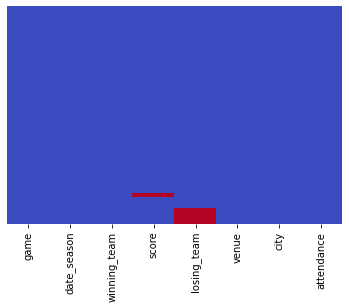

In [273]:
# Using Seaboen to add visual insight into missing values
missing_values = superBowls_df.isnull()
sns.heatmap(data = missing_values,yticklabels=False,cbar=False,cmap='coolwarm');

In [274]:
# 34-28 final score pats vs falcons
superBowls_df['score'].replace(np.NaN,'34-28',inplace=True)
superBowls_df.iloc[48:52,0:5]

,game,date_season,winning_team,score,losing_team
48,XLIX,"February 1, 2015",New England Patriots,28–24,Seattle Seahawks
49,50,"February 7, 2016",Denver Broncos,24–10,Carolina Panthers
50,LI,"February 5, 2017",New England Patriots,34-28,Atlanta Falcons
51,LII,"February 4, 2018",Philadelphia Eagles,41–33,New England Patriots


### Droppnig NaN rows
Note, that we had to use `inplace=True` when dropping rows with at least one missing value.  This keeps the change...if we did not use inplace=True the defualt is False and the change would only be temporary. However, you could omit it and assign it to a variable.
* superBowls_df = superBowls_df.dropna()
* This is the same as: superBowls_df.dropna(inplace=True)

In [275]:
# First print shape  before
print(f"Shape before drop {superBowls_df.shape}")
superBowls_df.dropna(inplace=True)
print(f"Shape after drop {superBowls_df.shape}")

Shape before drop (58, 8)
Shape after drop (54, 8)


In [276]:
superBowls_df.tail(5)

,game,date_season,winning_team,score,losing_team,venue,city,attendance
49,50,"February 7, 2016",Denver Broncos,24–10,Carolina Panthers,Levi's Stadium,"Santa Clara, California","71,088"
50,LI,"February 5, 2017",New England Patriots,34-28,Atlanta Falcons,NRG Stadium,"Houston, Texas","70,807"
51,LII,"February 4, 2018",Philadelphia Eagles,41–33,New England Patriots,U.S. Bank Stadium,"Minneapolis, Minnesota","67,612"
52,LIII,"February 3, 2019",New England Patriots,13–3,Los Angeles Rams,Mercedes-Benz Stadium,"Atlanta, Georgia","70,081"
53,LIV,"February 2, 2020",Kansas City Chiefs,31–20,San Francisco 49ers,Hard Rock Stadium,"Miami Gardens, Florida","62,417"


In [277]:
# create two empty lists
win_score = []
lose_score = []
idx = []

# iterate over score column 
for row in superBowls_df.itertuples():
    # Need to skip the score we added. It was a sting and results in error when we call string on python str
    if row.Index != 50:
        # The score column is a bs4 element type. Need to use 'unidecode' before we cab convert to string
        converted = unidecode.unidecode(row.score.string)
        # Find the '-' location
        y = converted.find('-')
        # rutun values up tp '-'
        win_score.append(converted[:y])
        # return values after '-'
        lose_score.append(converted[y+1:])
    else:
        score_str = row.score
        y = score_str.find('-')
        # rutun values up tp '-'
        win_score.append(score_str[:y])
        # return values after '-'
        lose_score.append(score_str[y+1:])
        

print(win_score)
print("\n")
print(lose_score)

['35', '33', '16', '23', '16', '24', '14', '24', '16', '21', '32', '27', '35', '31', '27', '26', '27', '38', '38', '46', '39', '42', '20', '55', '20', '37', '52', '30', '49', '27', '35', '31', '34', '23', '34', '20', '48', '32', '24', '21', '29', '17', '27', '31', '31', '21', '34', '43', '28', '24', '34', '41', '13', '31']


['10', '14', '7 ', '7 ', '13', '3 ', '7 ', '7 ', '6 ', '17', '14', '10', '31', '19', '10', '21', '17', '9 ', '16', '10', '20', '10', '16', '10', '19', '24', '17', '13', '26', '17', '21', '24', '19', '16', '7 ', '17', '21', '29', '21', '10', '17', '14', '23', '17', '25', '17', '31', '8', '24', '10', '28', '33', '3 ', '20 ']


### Add Two New Columns 
We have created two lists: One containing the winners total points and the other containing the losers total points. We can add these two columns to the right on the current score column. We can complete a quick spot check and if everything looks good drop the score column. 

In [278]:
superBowls_df.insert(4, "win_score", win_score, allow_duplicates=False)
superBowls_df.insert(5, "lose_score", lose_score, allow_duplicates=False)

In [279]:
superBowls_df.head(3)

,game,date_season,winning_team,score,win_score,lose_score,losing_team,venue,city,attendance
0,I,"January 15, 1967",Green Bay Packers,35–10,35,10,Kansas City Chiefs,Los Angeles Memorial Coliseum,"Los Angeles, California","61,946"
1,II,"January 14, 1968",Green Bay Packers,33–14,33,14,Oakland Raiders,Miami Orange Bowl,"Miami, Florida","75,546"
2,III,"January 12, 1969",New York Jets,16–7,16,7,Baltimore Colts,Miami Orange Bowl,"Miami, Florida","75,389"


In [280]:
superBowls_df.tail(3)

,game,date_season,winning_team,score,win_score,lose_score,losing_team,venue,city,attendance
51,LII,"February 4, 2018",Philadelphia Eagles,41–33,41,33,New England Patriots,U.S. Bank Stadium,"Minneapolis, Minnesota","67,612"
52,LIII,"February 3, 2019",New England Patriots,13–3,13,3,Los Angeles Rams,Mercedes-Benz Stadium,"Atlanta, Georgia","70,081"
53,LIV,"February 2, 2020",Kansas City Chiefs,31–20,31,20,San Francisco 49ers,Hard Rock Stadium,"Miami Gardens, Florida","62,417"


In [281]:
# Everything looks good we can drop the score column
superBowls_df = superBowls_df.drop(['score'], axis = 1) 
# validate that there are only 8 columns
superBowls_df.head(0)

,game,date_season,winning_team,win_score,lose_score,losing_team,venue,city,attendance


### Adjust Data Types & Game Column
Next we will be converting game, win_score, lose_score and attendance to type int.  As well, replacing roman numeral with integer values. 

In [282]:
# Lets review the data types 
superBowls_df.dtypes

game            object
date_season     object
winning_team    object
win_score       object
lose_score      object
losing_team     object
venue           object
city            object
attendance      object
dtype: object

In [283]:
# From NumPy use linspace to create a NumPy array 1 - 54 type int
game_num = np.linspace(1, 54, num = 54, dtype='int')
lin_space

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54])

Using NumPy we created an array (similar to Python list). We can now drop the `game` column and add it back with the new list of values. Then check the top and bottom to ensure everything is correct.  We start with 1 and end with 54 which is what we wanted. 

In [284]:
# Drop the column game
superBowls_df = superBowls_df.drop(['game'], axis = 1) 

# Add column game at index 0 with new int values 
superBowls_df.insert(0, "game", game_num, allow_duplicates=False)

# Check the results top
superBowls_df.head(2)

,game,date_season,winning_team,win_score,lose_score,losing_team,venue,city,attendance
0,1,"January 15, 1967",Green Bay Packers,35,10,Kansas City Chiefs,Los Angeles Memorial Coliseum,"Los Angeles, California","61,946"
1,2,"January 14, 1968",Green Bay Packers,33,14,Oakland Raiders,Miami Orange Bowl,"Miami, Florida","75,546"


In [285]:
# Check the results bottom
superBowls_df.tail(2)

,game,date_season,winning_team,win_score,lose_score,losing_team,venue,city,attendance
52,53,"February 3, 2019",New England Patriots,13,3,Los Angeles Rams,Mercedes-Benz Stadium,"Atlanta, Georgia","70,081"
53,54,"February 2, 2020",Kansas City Chiefs,31,20,San Francisco 49ers,Hard Rock Stadium,"Miami Gardens, Florida","62,417"


#### Replace Commas 
To convert `attendance` to int64 we first need to replace the commas. Pandas has an `apply` function that allows you to apply a function to column(s) and row(s). Here we just need to replace the commas so we use the Python lamda function. X represents each value within `attendance` and we want to replace any `,` with `""`.

Next, we need to convert the data types. We can use pandas `.astype` to convert this for us.  Note, if we are doing multiple columns we use `DataFrame.astype()` which requires the use of a dictionary, as completed below.  If we wanted to do just one column (which is a pandas series) we would use `Series.astype()`
* `superBowls_df['examle_column'] = superBowls_df['examle_column'].astype('int64')`

In [286]:
# replace the commas
superBowls_df['attendance'] = superBowls_df['attendance'].apply(lambda x: x.replace(',', ''))

# Change the data type
superBowls_df = superBowls_df.astype({'win_score':'int64','lose_score':'int64','attendance':'int64'})

In [287]:
# Validate attendance looks correct
superBowls_df.head()

,game,date_season,winning_team,win_score,lose_score,losing_team,venue,city,attendance
0,1,"January 15, 1967",Green Bay Packers,35,10,Kansas City Chiefs,Los Angeles Memorial Coliseum,"Los Angeles, California",61946
1,2,"January 14, 1968",Green Bay Packers,33,14,Oakland Raiders,Miami Orange Bowl,"Miami, Florida",75546
2,3,"January 12, 1969",New York Jets,16,7,Baltimore Colts,Miami Orange Bowl,"Miami, Florida",75389
3,4,"January 11, 1970",Kansas City Chiefs,23,7,Minnesota Vikings,Tulane Stadium,"New Orleans, Louisiana",80562
4,5,"January 17, 1971",Baltimore Colts,16,13,Dallas Cowboys,Miami Orange Bowl,"Miami, Florida",79204


In [288]:
# Validate the data types 
superBowls_df.dtypes

game             int32
date_season     object
winning_team    object
win_score        int64
lose_score       int64
losing_team     object
venue           object
city            object
attendance       int64
dtype: object

# Initial Data Analysis 
We have cleaned up the dataset and now we can start to complete an initial analysis of data. Typically, I like to create a list of ***observations***  & ***to-dos***, as I start working through the data. Typically, this will be at the bottom. 

Using `value_counts` is a quick way to start exploring the data. Here we can see that the Steelers and the Patriots have the most wins. We can also quickly adjust so it shows the relative frequency of the unique values.   One thing I am noticing is that the Detroit Lions are not showing up.  This must be a mistake and that can be added to the To-Dos list to follow up on!   

In [316]:
win_v_counts = superBowls_df['winning_team'].value_counts()
win_v_counts

Pittsburgh Steelers     6
New England Patriots    6
San Francisco 49ers     5
Dallas Cowboys          5
New York Giants         4
Green Bay Packers       4
Washington Redskins     3
Denver Broncos          3
Miami Dolphins          2
Baltimore Ravens        2
Oakland Raiders         2
Kansas City Chiefs      2
Chicago Bears           1
Philadelphia Eagles     1
Seattle Seahawks        1
New Orleans Saints      1
Indianapolis Colts      1
New York Jets           1
Tampa Bay Buccaneers    1
Baltimore Colts         1
St. Louis Rams          1
Los Angeles Raiders     1
Name: winning_team, dtype: int64

In [317]:
superBowls_df['winning_team'].value_counts(normalize=True)

Pittsburgh Steelers     0.111111
New England Patriots    0.111111
San Francisco 49ers     0.092593
Dallas Cowboys          0.092593
New York Giants         0.074074
Green Bay Packers       0.074074
Washington Redskins     0.055556
Denver Broncos          0.055556
Miami Dolphins          0.037037
Baltimore Ravens        0.037037
Oakland Raiders         0.037037
Kansas City Chiefs      0.037037
Chicago Bears           0.018519
Philadelphia Eagles     0.018519
Seattle Seahawks        0.018519
New Orleans Saints      0.018519
Indianapolis Colts      0.018519
New York Jets           0.018519
Tampa Bay Buccaneers    0.018519
Baltimore Colts         0.018519
St. Louis Rams          0.018519
Los Angeles Raiders     0.018519
Name: winning_team, dtype: float64

#### Losing Teams 
Here we take a quick look at the losing teams. Taking a quick look I am still shocked...something must be incorrect. The Detroit Lions have never won or even lost a Super Bowl?!?!

In [318]:
lose_v_counts = superBowls_df['losing_team'].value_counts()
lose_v_counts

Denver Broncos          5
New England Patriots    5
Buffalo Bills           4
Minnesota Vikings       4
Dallas Cowboys          3
Miami Dolphins          3
Carolina Panthers       2
Philadelphia Eagles     2
Washington Redskins     2
Los Angeles Rams        2
Cincinnati Bengals      2
Oakland Raiders         2
San Francisco 49ers     2
Pittsburgh Steelers     2
Seattle Seahawks        2
Atlanta Falcons         2
New York Giants         1
Arizona Cardinals       1
Indianapolis Colts      1
St. Louis Rams          1
Kansas City Chiefs      1
Tennessee Titans        1
San Diego Chargers      1
Green Bay Packers       1
Baltimore Colts         1
Chicago Bears           1
Name: losing_team, dtype: int64

In [ ]:
### 

## Quick Plots & Hiding Coding Cells
Here we created a quick side-by-side plot of Super Bowl Champions and runner-ups.  One additional feature is we can quickly hide codes cells. This makes it easier to read and if you decide to share with a non-technical user as a PDF or slides then its a quick option to add.
* Select View then Collapse All Code

To export the notebook:
* Select File then Export Notebook As...
* Goto options are HTML and PDF

Last one, Check out Presentation Mode:
* Select View then Presentation Mode

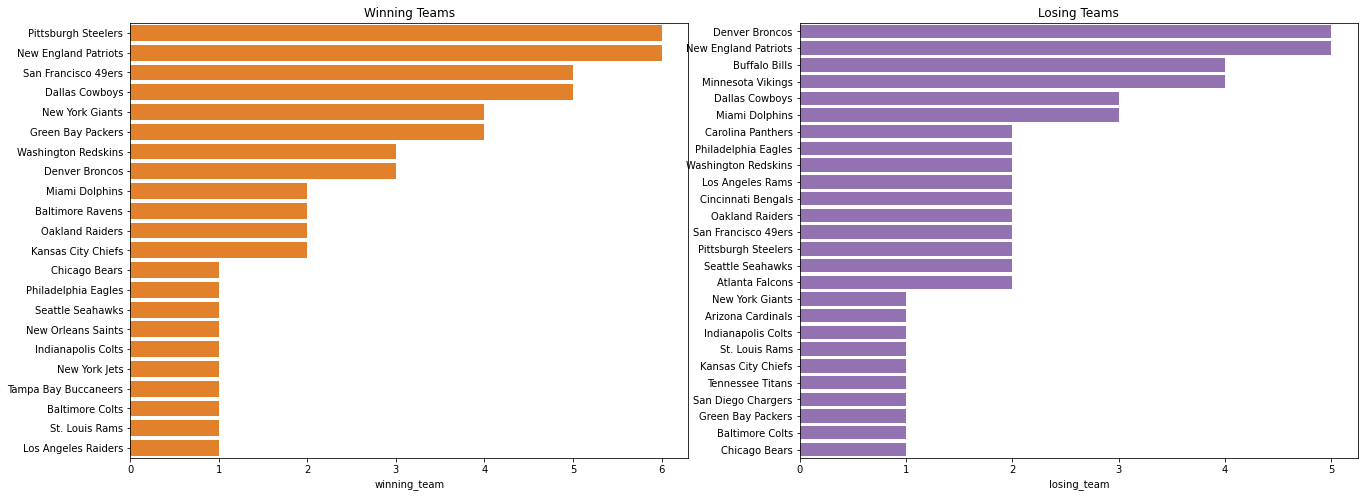

In [319]:
plt.figure(figsize=(22,8))

plt.subplot(1,2,1)
# Winning
color1 = sns.color_palette()[1]
plt.title("Winning Teams")
sns.barplot(win_v_counts, win_v_counts.index, color = color1, orient="h");

plt.subplot(1,2,2)
# Losing
plt.title("Losing Teams")
color2 = sns.color_palette()[4]
sns.barplot(lose_v_counts, lose_v_counts.index, color = color2, orient="h");

In [338]:
df_win_lose = superBowls_df[['winning_team', 'losing_team']]
df_win_lose_sum = df_win_lose.groupby(['winning_team', 'losing_team']).sum()
df_win_lose_sum

Empty DataFrame
Columns: []
Index: [(Baltimore Colts, Dallas Cowboys), (Baltimore Ravens, New York Giants), (Baltimore Ravens, San Francisco 49ers), (Chicago Bears, New England Patriots), (Dallas Cowboys, Buffalo Bills), (Dallas Cowboys, Denver Broncos), (Dallas Cowboys, Miami Dolphins), (Dallas Cowboys, Pittsburgh Steelers), (Denver Broncos, Atlanta Falcons), (Denver Broncos, Carolina Panthers), (Denver Broncos, Green Bay Packers), (Green Bay Packers, Kansas City Chiefs), (Green Bay Packers, New England Patriots), (Green Bay Packers, Oakland Raiders), (Green Bay Packers, Pittsburgh Steelers), (Indianapolis Colts, Chicago Bears), (Kansas City Chiefs, Minnesota Vikings), (Kansas City Chiefs, San Francisco 49ers), (Los Angeles Raiders, Washington Redskins), (Miami Dolphins, Minnesota Vikings), (Miami Dolphins, Washington Redskins), (New England Patriots, Atlanta Falcons), (New England Patriots, Carolina Panthers), (New England Patriots, Los Angeles Rams), (New England Patriots, Philadelphia Eagles), (New England Patriots, Seattle Seahawks), (New England Patriots, St. Louis Rams), (New Orleans Saints, Indianapolis Colts), (New York Giants, Buffalo Bills), (New York Giants, Denver Broncos), (New York Giants, New England Patriots), (New York Jets, Baltimore Colts), (Oakland Raiders, Minnesota Vikings), (Oakland Raiders, Philadelphia Eagles), (Philadelphia Eagles, New England Patriots), (Pittsburgh Steelers, Arizona Cardinals), (Pittsburgh Steelers, Dallas Cowboys), (Pittsburgh Steelers, Los Angeles Rams), (Pittsburgh Steelers, Minnesota Vikings), (Pittsburgh Steelers, Seattle Seahawks), (San Francisco 49ers, Cincinnati Bengals), (San Francisco 49ers, Denver Broncos), (San Francisco 49ers, Miami Dolphins), (San Francisco 49ers, San Diego Chargers), (Seattle Seahawks, Denver Broncos), (St. Louis Rams, Tennessee Titans), (Tampa Bay Buccaneers, Oakland Raiders), (Washington Redskins, Buffalo Bills), (Washington Redskins, Denver Broncos), (Washington Redskins, Miami Dolphins)]

In [348]:
type(win_v_counts)

pandas.core.series.Series

In [358]:
# Create two new dataframes
df_wins = superBowls_df['winning_team'].value_counts().rename_axis('winners').reset_index(name = 'wins')
df_loses = superBowls_df['losing_team'].value_counts().rename_axis('losers').reset_index(name = 'loses')

In [359]:
df_wins.head(5)

,winners,wins
0,Pittsburgh Steelers,6
1,New England Patriots,6
2,San Francisco 49ers,5
3,Dallas Cowboys,5
4,New York Giants,4


In [360]:
df_loses.head(5)

,losers,loses
0,Denver Broncos,5
1,New England Patriots,5
2,Buffalo Bills,4
3,Minnesota Vikings,4
4,Dallas Cowboys,3


### Observations and To-Dos

#### `Observations`
- [ ] TBD
- [ ] TBD
- [ ] TBD
- [ ] TBD
- [ ] TBD
- [ ] TBD


#### `To-Dos`
- [ ] Detroit Lions are not showing up as ever winning a Super Bowl. Is that correct? 
- [ ] TBD
- [ ] TBD
- [ ] TBD
- [ ] TBD
- [ ] TBD